In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

data = load_iris()
data.target[[10, 25, 50]]
list(data.target_names)
data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
columns= data['feature_names'] + ['target'])
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [2]:
data1.sum(axis=1)

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    19.2
146    17.7
147    18.7
148    19.3
149    17.8
Length: 150, dtype: float64

In [4]:
data1.idxmax()

sepal length (cm)    131
sepal width (cm)      15
petal length (cm)    118
petal width (cm)     100
target               100
dtype: int64

In [5]:
data1.cumsum()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,10.0,6.5,2.8,0.4,0.0
2,14.7,9.7,4.1,0.6,0.0
3,19.3,12.8,5.6,0.8,0.0
4,24.3,16.4,7.0,1.0,0.0
...,...,...,...,...,...
145,851.6,446.7,543.0,171.9,142.0
146,857.9,449.2,548.0,173.8,144.0
147,864.4,452.2,553.2,175.8,146.0
148,870.6,455.6,558.6,178.1,148.0


In [6]:
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Описательные статистики

descriptive_stats = data1.describe().T
descriptive_stats = descriptive_stats[['mean', '50%', 'std', 'min', 'max', 'count']]
descriptive_stats.rename(columns={'50%': 'median'}, inplace=True)

# Статистики с группировкой по видам ирисов (target)
grouped_stats = data1.groupby('target').agg({
    'sepal length (cm)': ['mean', 'median', 'std', 'min', 'max'],
    'sepal width (cm)': ['mean', 'median', 'std', 'min', 'max'],
    'petal length (cm)': ['mean', 'median', 'std', 'min', 'max'],
    'petal width (cm)': ['mean', 'median', 'std', 'min', 'max']
})

grouped_stats

sepal length (cm)                            sepal width (cm)         \
                    mean median       std  min  max             mean median   
target                                                                        
0.0                5.006    5.0  0.352490  4.3  5.8            3.428    3.4   
1.0                5.936    5.9  0.516171  4.9  7.0            2.770    2.8   
2.0                6.588    6.5  0.635880  4.9  7.9            2.974    3.0   

                           petal length (cm)                             \
             std  min  max              mean median       std  min  max   
target                                                                    
0.0     0.379064  2.3  4.4             1.462   1.50  0.173664  1.0  1.9   
1.0     0.313798  2.0  3.4             4.260   4.35  0.469911  3.0  5.1   
2.0     0.322497  2.2  3.8             5.552   5.55  0.551895  4.5  6.9   

       petal width (cm)                             
                   mean median       std  min  max  
target                                              
0.0               0.246    0.2  0.105386  0.1  0.6  
1.0               1.326    1.3  0.197753  1.0  1.8  
2.0               2.026    2.0  0.274650  1.4  2.5

In [11]:
# редукция данных

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Отделяем признаки и целевую переменную
X = data1.iloc[:, :4]
y = data1['target']

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Создание DataFrame с главными компонентами
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)

# Объединение с целевой переменной
final_df = pd.concat([pca_df, y], axis=1)

final_df

,PC1,PC2,target
0,-2.264703,0.480027,0.0
1,-2.080961,-0.674134,0.0
2,-2.364229,-0.341908,0.0
3,-2.299384,-0.597395,0.0
4,-2.389842,0.646835,0.0
...,...,...,...
145,1.870503,0.386966,2.0
146,1.564580,-0.896687,2.0
147,1.521170,0.269069,2.0
148,1.372788,1.011254,2.0


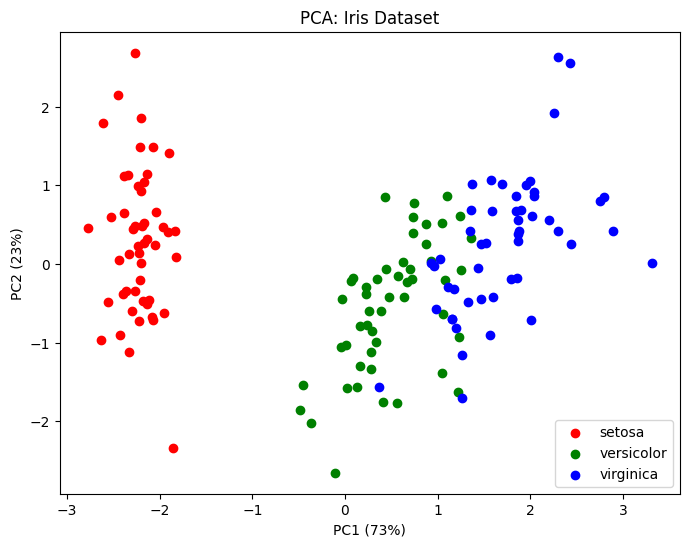

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
targets = [0, 1, 2]
names = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color, name in zip(targets, colors, names):
    plt.scatter(
        final_df.loc[final_df['target'] == target, 'PC1'],
        final_df.loc[final_df['target'] == target, 'PC2'],
        c=color,
        label=name
    )
    
plt.xlabel('PC1 (73%)')
plt.ylabel('PC2 (23%)')
plt.legend()
plt.title('PCA: Iris Dataset')
plt.show()